<a href="https://colab.research.google.com/github/tolgaenginn/ergasia-4/blob/main/ergasia4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_absolute_error
)


#------------------------------------PART 1-------------------------------------




#QUESTION 1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


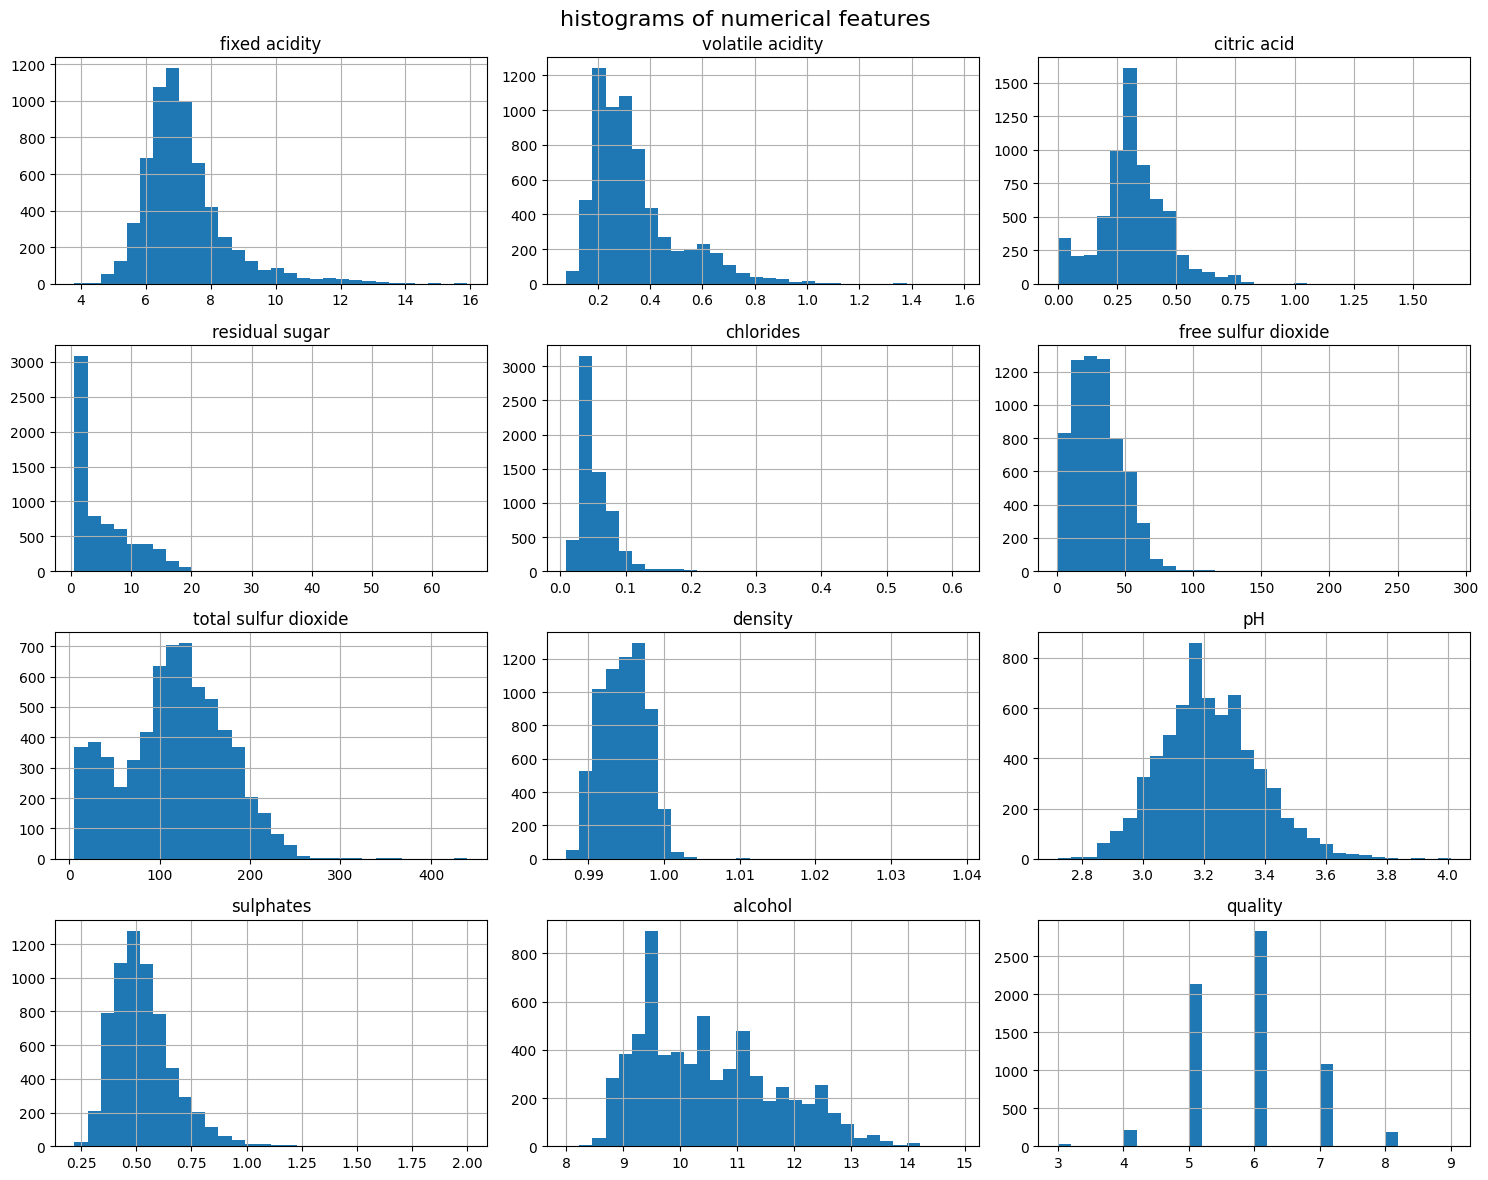

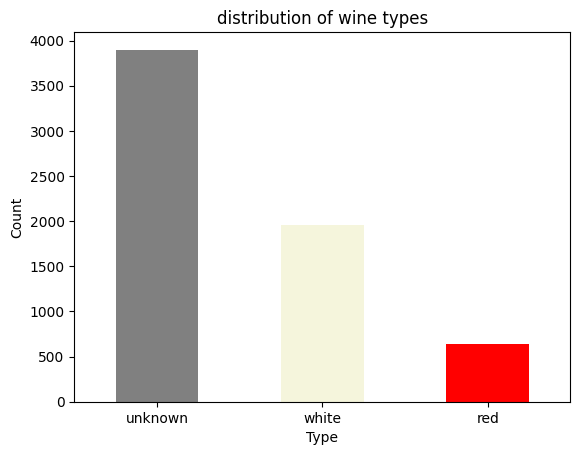

In [6]:
#load dataset
df = pd.read_csv("wine-missing.csv")

#describe each feature
display(df.describe())

#create histogram
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(figsize=(15, 12), bins=30)
plt.suptitle("histograms of numerical features", fontsize=16)
plt.tight_layout()
plt.show()

#For the variable Type, create a bar plot for the values white, red, and
# unknown, where unknown means it is not known whether the wine samples were white or red.
df['type'].value_counts().plot(kind='bar', color=['gray', 'beige', 'red'])
plt.title("distribution of wine types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


#QUESTION 2

In [7]:
mapping = {"white": 0, "red": 1, "unknown": 2}
df["type"] = df["type"].map(mapping)

#create numpy arrays x and y
x = df.drop(columns=["type"]).to_numpy()
y = df["type"].to_numpy()

print("\nShapes:")
print("x shape =", x.shape)
print("y shape =", y.shape)



Shapes:
x shape = (6497, 12)
y shape = (6497,)


#QUESTION 3

In [8]:
#Create 2 separate datasets: (x_known, y_known) and x_unknown.
known_mask = df["type"] != 2
unknown_mask = df["type"] == 2

x_known = df.loc[known_mask].drop(columns=["type"]).to_numpy()
y_known = df.loc[known_mask]["type"].to_numpy()
x_unknown = df.loc[unknown_mask].drop(columns=["type"]).to_numpy()

print("x_known shape =", x_known.shape)
print("y_known shape =", y_known.shape)
print("x_unknown shape =", x_unknown.shape)

x_known shape = (2599, 12)
y_known shape = (2599,)
x_unknown shape = (3898, 12)


#QUESTION 4

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    x_known,
    y_known,
    test_size=0.30,
    random_state=42,
    stratify=y_known # cant get value True!!!
)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1819, 12)
y_train shape: (1819,)
x_test shape: (780, 12)
y_test shape: (780,)


#QUESTION 5

In [10]:
#train random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

#metrics
def print_metrics(y_true, y_pred, name=""):
    print(f"\n--- {name.upper()} METRICS ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("F1-score :", f1_score(y_true, y_pred, average='weighted'))

print_metrics(y_train, y_pred_train, "train")
print_metrics(y_test, y_pred_test, "test")



--- TRAIN METRICS ---
Accuracy : 0.999450247388675
Precision: 0.9994514717820188
Recall   : 0.999450247388675
F1-score : 0.9994504535450379

--- TEST METRICS ---
Accuracy : 0.9987179487179487
Precision: 0.9987245914707055
Recall   : 0.9987179487179487
F1-score : 0.9987190681658766


#QUESTION 6

In [11]:
#retrain again
rf_balanced = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'
)

rf_balanced.fit(x_train, y_train)

y_pred_train_bal = rf_balanced.predict(x_train)
y_pred_test_bal = rf_balanced.predict(x_test)

print_metrics(y_train, y_pred_train_bal, "train (balanced)")
print_metrics(y_test, y_pred_test_bal, "test (balanced)")



--- TRAIN (BALANCED) METRICS ---
Accuracy : 0.999450247388675
Precision: 0.9994514717820188
Recall   : 0.999450247388675
F1-score : 0.9994504535450379

--- TEST (BALANCED) METRICS ---
Accuracy : 0.9948717948717949
Precision: 0.9948713374047896
Recall   : 0.9948717948717949
F1-score : 0.9948627235660897


explanation: it automatically adjusts weights "inversely proportional" to the class frequencies. classes with fewer appearances will get higher weights and with more appearences get lower weights.

#QUESTION 7

In [13]:
y_unknown_proba = rf_balanced.predict_proba(x_unknown)

print(y_unknown_proba[:5])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


#QUESTION 8

In [14]:
#red probability
proba_red = y_unknown_proba[:, 1]

y_unknown_pred = np.full(shape=len(proba_red), fill_value=-1)

y_unknown_pred[proba_red > 0.65] = 1   # red
y_unknown_pred[proba_red < 0.35] = 0   # white

# Check how many confident predictions we got
print("Total:", len(y_unknown_pred))
print("white predictions:", np.sum(y_unknown_pred == 0))
print("red predictions:", np.sum(y_unknown_pred == 1))
print("inconfident samples:", np.sum(y_unknown_pred == -1))


Total: 3898
white predictions: 2939
red predictions: 908
inconfident samples: 51


#QUESTION 9

In [15]:
confident_mask = y_unknown_pred != -1

x_confident = x_unknown[confident_mask]
y_confident = y_unknown_pred[confident_mask]

print("confident samples added:", len(y_confident))

#merge
x_train_aug = np.vstack([x_train, x_confident])
y_train_aug = np.concatenate([y_train, y_confident])

print("new x_train_aug shape:", x_train_aug.shape)
print("new y_train_aug shape:", y_train_aug.shape)

#retrain random forest
rf_aug = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_aug.fit(x_train_aug, y_train_aug)

y_pred_train_aug = rf_aug.predict(x_train)
y_pred_test_aug = rf_aug.predict(x_test)

print_metrics(y_train, y_pred_train_aug, "train (extended)")
print_metrics(y_test, y_pred_test_aug, "test (extended)")


confident samples added: 3847
new x_train_aug shape: (5666, 12)
new y_train_aug shape: (5666,)

--- TRAIN (EXTENDED) METRICS ---
Accuracy : 0.999450247388675
Precision: 0.9994514717820188
Recall   : 0.999450247388675
F1-score : 0.9994504535450379

--- TEST (EXTENDED) METRICS ---
Accuracy : 0.9948717948717949
Precision: 0.9948713374047896
Recall   : 0.9948717948717949
F1-score : 0.9948627235660897


#QUESTION 10

In [16]:
x_train_iter = x_train.copy()
y_train_iter = y_train.copy()
x_unknown_iter = x_unknown.copy()

iteration = 0

while True:
    iteration += 1
    print(f"\n===== ITERATION {iteration} =====")

    #train model
    model = RandomForestClassifier(random_state=42, class_weight='balanced')
    model.fit(x_train_iter, y_train_iter)

    # predictions
    y_unknown_proba = model.predict_proba(x_unknown_iter)
    proba_red = y_unknown_proba[:, 1]

    #assign psdeo labels
    y_unknown_pred = np.full(len(proba_red), -1)
    y_unknown_pred[proba_red > 0.65] = 1   # red
    y_unknown_pred[proba_red < 0.35] = 0   # white

    #identify confident samples
    confident_mask = (y_unknown_pred != -1)
    n_confident = np.sum(confident_mask)

    print("Confident samples found:", n_confident)

    if n_confident == 0:
        print("no conf samples left")
        break

    x_confident = x_unknown_iter[confident_mask]
    y_confident = y_unknown_pred[confident_mask]

    x_train_iter = np.vstack([x_train_iter, x_confident])
    y_train_iter = np.concatenate([y_train_iter, y_confident])

    # remove confident samples from unknown set
    x_unknown_iter = x_unknown_iter[~confident_mask]

    print("remaining unknown samples:", x_unknown_iter.shape[0])

y_pred_train_final = model.predict(x_train)
y_pred_test_final = model.predict(x_test)

print_metrics(y_train, y_pred_train_final, "train (final)")
print_metrics(y_test, y_pred_test_final, "test (final)")



===== ITERATION 1 =====
Confident samples found: 3847
remaining unknown samples: 51

===== ITERATION 2 =====
Confident samples found: 23
remaining unknown samples: 28

===== ITERATION 3 =====
Confident samples found: 2
remaining unknown samples: 26

===== ITERATION 4 =====
Confident samples found: 5
remaining unknown samples: 21

===== ITERATION 5 =====
Confident samples found: 1
remaining unknown samples: 20

===== ITERATION 6 =====
Confident samples found: 0
no conf samples left

--- TRAIN (FINAL) METRICS ---
Accuracy : 0.999450247388675
Precision: 0.9994514717820188
Recall   : 0.999450247388675
F1-score : 0.9994504535450379

--- TEST (FINAL) METRICS ---
Accuracy : 0.9961538461538462
Precision: 0.9961514871585183
Recall   : 0.9961538461538462
F1-score : 0.9961504589454127


#------------------------------------PART 2-------------------------------------




#QUESTION 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


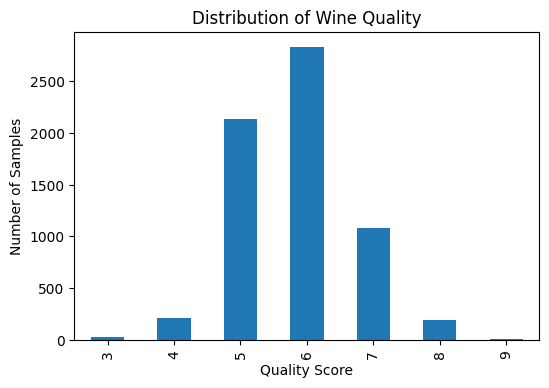

In [21]:
df_full = pd.read_csv("wine-full.csv")

print(df_full.info())

#distribution of the 'quality' variable
quality_counts = df_full["quality"].value_counts().sort_index()

# Plot distribution
plt.figure(figsize=(6,4))
quality_counts.plot(kind="bar")
plt.xlabel("Quality Score")
plt.ylabel("Number of Samples")
plt.title("Distribution of Wine Quality")
plt.show()



not  balanced as certan values appear more often than others visible from graph above. for exmaple 6 is very high while 9 is almost invisible

#QUESTION 2

In [24]:
# mean
print("\nMean quality by type:")
print(df_full.groupby("type")["quality"].mean())

# median
print("\nMedian quality by type:")
print(df_full.groupby("type")["quality"].median())



Mean quality by type:
type
red      5.636023
white    5.877909
Name: quality, dtype: float64

Median quality by type:
type
red      6.0
white    6.0
Name: quality, dtype: float64


median is the same. white has a higher mean quality. overall quality of white wine is better

#QUESTION 3

Correlation between sweetness and quality: -0.036824778601522085


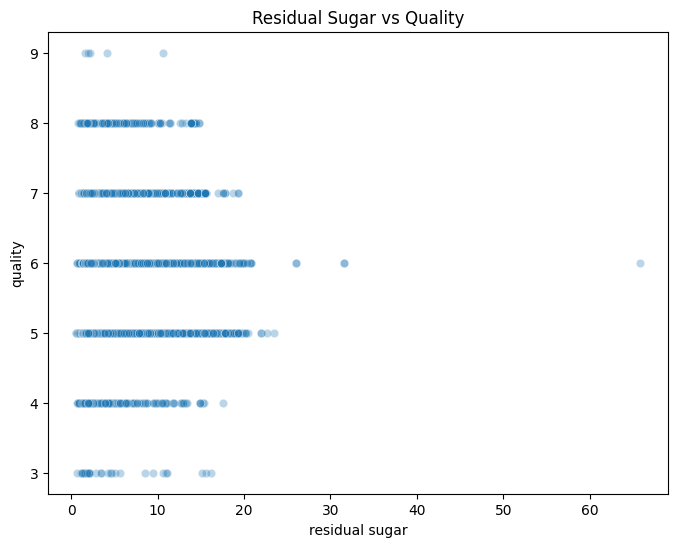

sweetness
dry           3569
semi-sweet    2092
sweet          834
Name: count, dtype: int64

Mean quality by sweetness category:
sweetness
dry           5.822079
semi-sweet    5.834608
sweet         5.760192
Name: quality, dtype: float64


/tmp/ipython-input-1468324577.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_full.groupby("sweetness")["quality"].mean())


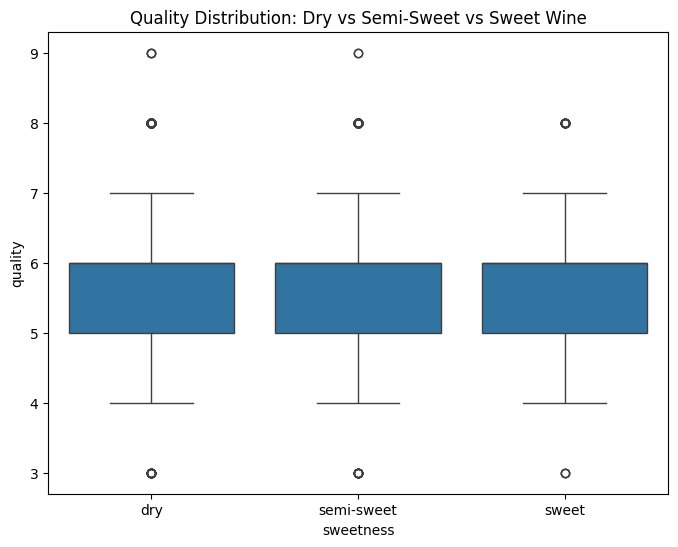

In [26]:
#correlation
corr = df_full["residual sugar"].corr(df_full["quality"])
print("Correlation between sweetness and quality:", corr)

#scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_full, x="residual sugar", y="quality", alpha=0.3)
plt.title("Residual Sugar vs Quality")
plt.show()

#categories
df_full["sweetness"] = pd.cut(
    df_full["residual sugar"],
    bins=[-1, 4, 12, 100],
    labels=["dry", "semi-sweet", "sweet"]
)

#mean quality
print(df_full["sweetness"].value_counts())

print("\nMean quality by sweetness category:")
print(df_full.groupby("sweetness")["quality"].mean())

plt.figure(figsize=(8,6))
sns.boxplot(data=df_full, x="sweetness", y="quality")
plt.title("Quality Distribution: Dry vs Semi-Sweet vs Sweet Wine")
plt.show()


from correlation metric as our value is close to zero there is no linear relationship.
also from the scatterplot there are no relationships visible

from metrics above sweet wines are the least common. their quality score is slightly lower. so sweetness has no improvement on quality


#QUESTION 4

In [27]:
x = df_full.drop(columns=["quality"]).to_numpy()
y = df_full["quality"].to_numpy()

# split again
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.10,
    random_state=0
)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (5847, 13)
y_train shape: (5847,)
x_test shape: (650, 13)
y_test shape: (650,)


#QUESTION 5

In [31]:
#train dec tree again
df_full = pd.read_csv("wine-full.csv")

mapping_full = {"white": 0, "red": 1}
df_full["type"] = df_full["type"].map(mapping_full)

x = df_full.drop(columns=["quality"]).to_numpy()
y = df_full["quality"].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.10,
    random_state=0
)

#compute mae
dt = DecisionTreeRegressor(random_state=0)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)

print("MAE on test set:", mae)



MAE on test set: 0.44769230769230767


#QUESTION 6

In [33]:


mae_list = []

# RRepeat steps 3–4 using 10 different seeds (0–9)
for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(
        x,
        y,
        test_size=0.10,
        random_state=seed
    )

    dt = DecisionTreeRegressor(random_state=seed)
    dt.fit(x_train, y_train)

    y_pred = dt.predict(x_test)

    #compute mae
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)
    print(f"Seed {seed}: MAE = {mae}")

#Then compute mean and standard deviation of MAE.
mae_mean = np.mean(mae_list)
mae_std = np.std(mae_list)

print("\n==============================")
print("MAE values:", mae_list)
print("Mean MAE:", mae_mean)
print("Std deviation of MAE:", mae_std)
print("==============================")


Seed 0: MAE = 0.44769230769230767
Seed 1: MAE = 0.4707692307692308
Seed 2: MAE = 0.4230769230769231
Seed 3: MAE = 0.48307692307692307
Seed 4: MAE = 0.5015384615384615
Seed 5: MAE = 0.4492307692307692
Seed 6: MAE = 0.47384615384615386
Seed 7: MAE = 0.4430769230769231
Seed 8: MAE = 0.4338461538461538
Seed 9: MAE = 0.49538461538461537

MAE values: [0.44769230769230767, 0.4707692307692308, 0.4230769230769231, 0.48307692307692307, 0.5015384615384615, 0.4492307692307692, 0.47384615384615386, 0.4430769230769231, 0.4338461538461538, 0.49538461538461537]
Mean MAE: 0.4621538461538462
Std deviation of MAE: 0.025243899022730665


we repeated the training for multiple times. we can observe how stable the model is.

if standard dev is low this means that model is consistent among different samples. this would imply the mean mae is a relaible estimate.

#QUESTION 7

In [38]:


# First split
x_train_full, x_test, y_train_full, y_test = train_test_split(
    x,
    y,
    test_size=0.10,
    random_state=0
)

# Second split
x_train2, x_val, y_train2, y_val = train_test_split(
    x_train_full,
    y_train_full,
    test_size=0.20,
    random_state=0
)

print("Shapes:")
print("Train:", x_train2.shape)
print("Validation:", x_val.shape)
print("Test:", x_test.shape)


#hype param with 15 diff combs
params = [
    {"max_depth": d, "min_samples_split": s}
    for d in [3, 5, 7, 9, None]
    for s in [2, 5, 10]
][:15]

results = []

#try combinations
for i, p in enumerate(params):
    model = DecisionTreeRegressor(
        max_depth=p["max_depth"],
        min_samples_split=p["min_samples_split"],
        random_state=0
    )

    model.fit(x_train2, y_train2)

    #train
    y_pred_train = model.predict(x_train2)
    y_pred_val = model.predict(x_val)

    mae_train = mean_absolute_error(y_train2, y_pred_train)
    mae_val = mean_absolute_error(y_val, y_pred_val)

    results.append((p, mae_train, mae_val))

    print(f"\nModel {i+1}")
    print("Parameters:", p)
    print("Train MAE:", mae_train)
    print("Validation MAE:", mae_val)


Shapes:
Train: (4677, 12)
Validation: (1170, 12)
Test: (650, 12)

Model 1
Parameters: {'max_depth': 3, 'min_samples_split': 2}
Train MAE: 0.5835424795080484
Validation MAE: 0.59002504497395

Model 2
Parameters: {'max_depth': 3, 'min_samples_split': 5}
Train MAE: 0.5835424795080484
Validation MAE: 0.59002504497395

Model 3
Parameters: {'max_depth': 3, 'min_samples_split': 10}
Train MAE: 0.5835424795080484
Validation MAE: 0.59002504497395

Model 4
Parameters: {'max_depth': 5, 'min_samples_split': 2}
Train MAE: 0.5421072718498778
Validation MAE: 0.5686565409646371

Model 5
Parameters: {'max_depth': 5, 'min_samples_split': 5}
Train MAE: 0.5421072718498778
Validation MAE: 0.5686565409646371

Model 6
Parameters: {'max_depth': 5, 'min_samples_split': 10}
Train MAE: 0.5421072718498778
Validation MAE: 0.5686565409646371

Model 7
Parameters: {'max_depth': 7, 'min_samples_split': 2}
Train MAE: 0.48652325215246145
Validation MAE: 0.5468547063385791

Model 8
Parameters: {'max_depth': 7, 'min_sample

#QUESTION 8

The validation set is more reliable for choosing hyperparameters. its generally used for hyperparam tuning. validation set contains data never seen before so a better option compared to training set.

#QUESTION 9

In [44]:

dt = DecisionTreeRegressor(random_state=0)

param_grid = {
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5]
}

#grid search
grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=10,
    n_jobs=-1
)

grid.fit(x_train, y_train)

# params
print("Best parameters:", grid.best_params_)
print("Best CV (negative MAE):", grid.best_score_)
print("Best CV MAE:", -grid.best_score_)


best_model = grid.best_estimator_


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV (negative MAE): -0.48452201147406626
Best CV MAE: 0.48452201147406626


#QUESTION 10

In [46]:

# use the best model from Question 9
best_model = grid.best_estimator_

y_pred_test_best = best_model.predict(x_test)

# Compute MAE on the test set
mae_test_best = mean_absolute_error(y_test, y_pred_test_best)

print("Test MAE using best model:", mae_test_best)


Test MAE using best model: 0.043076923076923075


9. its the cross validation with multiple folds. samples are divided and act as training and validation sets ffor many different times

#QUESTION 11

Best parameters (max_depth=5): {'min_samples_leaf': 10, 'min_samples_split': 2}
Best CV MAE: 0.5662697483583963


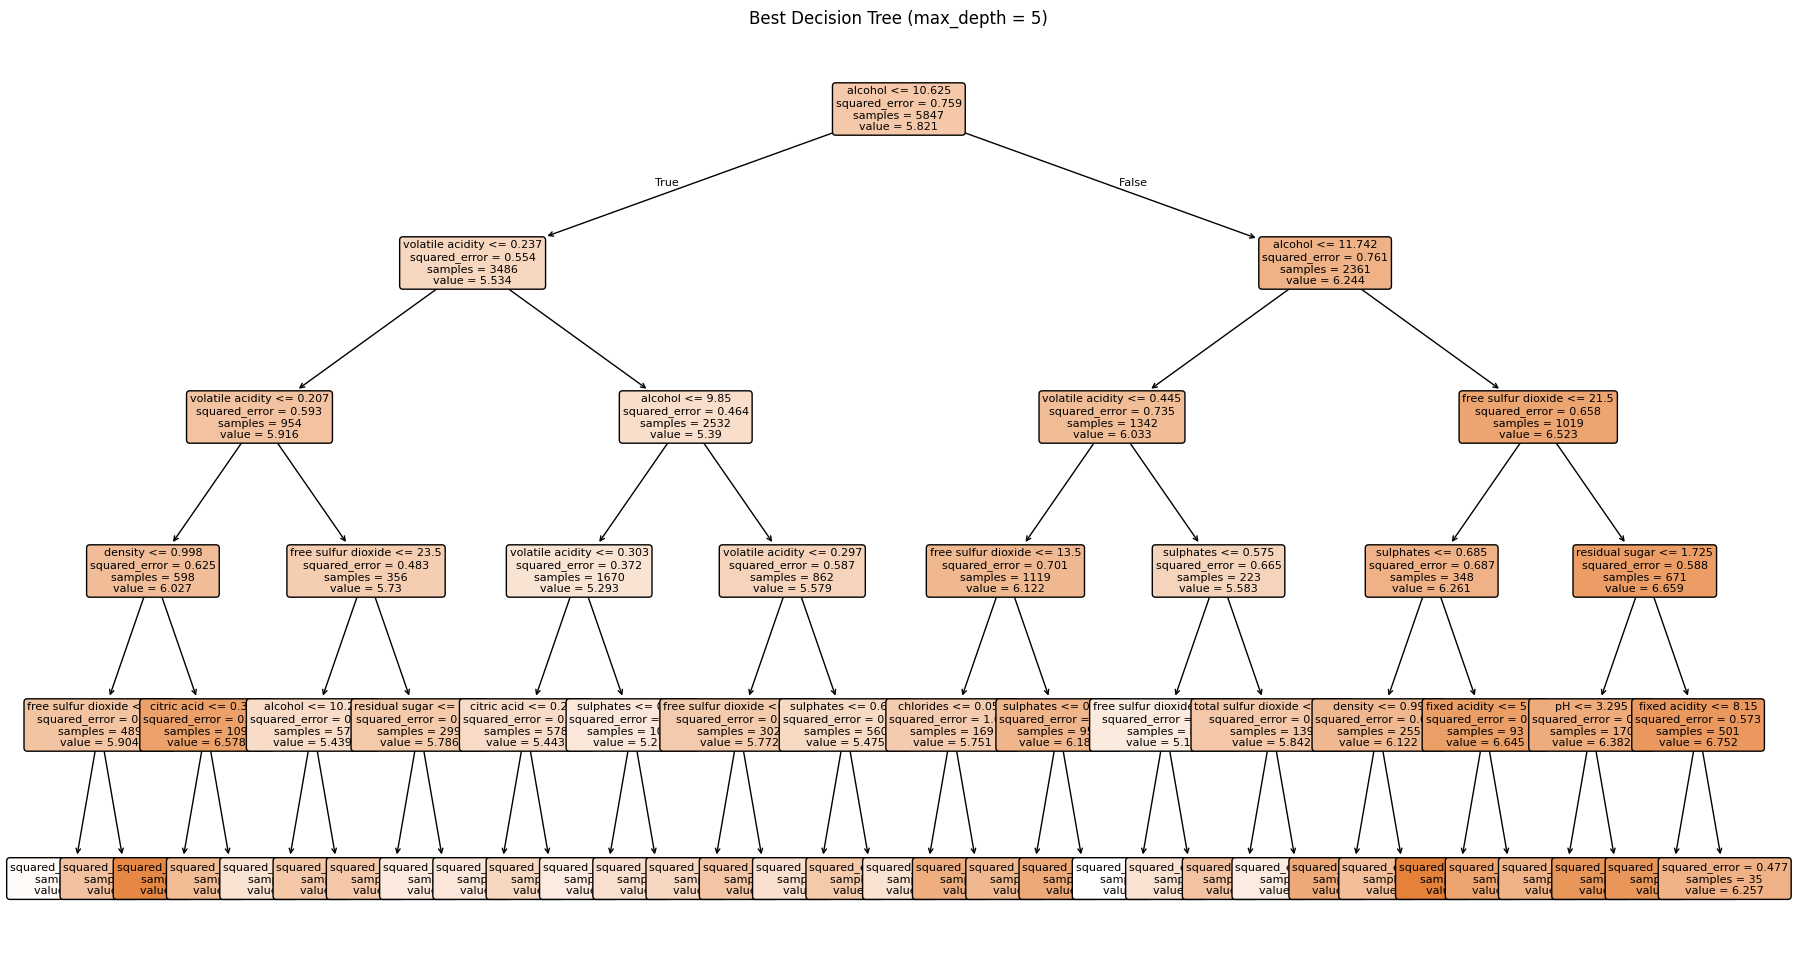


===== DECISION RULES =====
|--- alcohol <= 10.62
|   |--- volatile acidity <= 0.24
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- density <= 1.00
|   |   |   |   |--- free sulfur dioxide <= 7.50
|   |   |   |   |   |--- value: [4.83]
|   |   |   |   |--- free sulfur dioxide >  7.50
|   |   |   |   |   |--- value: [5.93]
|   |   |   |--- density >  1.00
|   |   |   |   |--- citric acid <= 0.31
|   |   |   |   |   |--- value: [7.07]
|   |   |   |   |--- citric acid >  0.31
|   |   |   |   |   |--- value: [6.07]
|   |   |--- volatile acidity >  0.21
|   |   |   |--- free sulfur dioxide <= 23.50
|   |   |   |   |--- alcohol <= 10.25
|   |   |   |   |   |--- value: [5.29]
|   |   |   |   |--- alcohol >  10.25
|   |   |   |   |   |--- value: [5.81]
|   |   |   |--- free sulfur dioxide >  23.50
|   |   |   |   |--- residual sugar <= 17.70
|   |   |   |   |   |--- value: [5.81]
|   |   |   |   |--- residual sugar >  17.70
|   |   |   |   |   |--- value: [5.17]
|   |--- volatile acidit

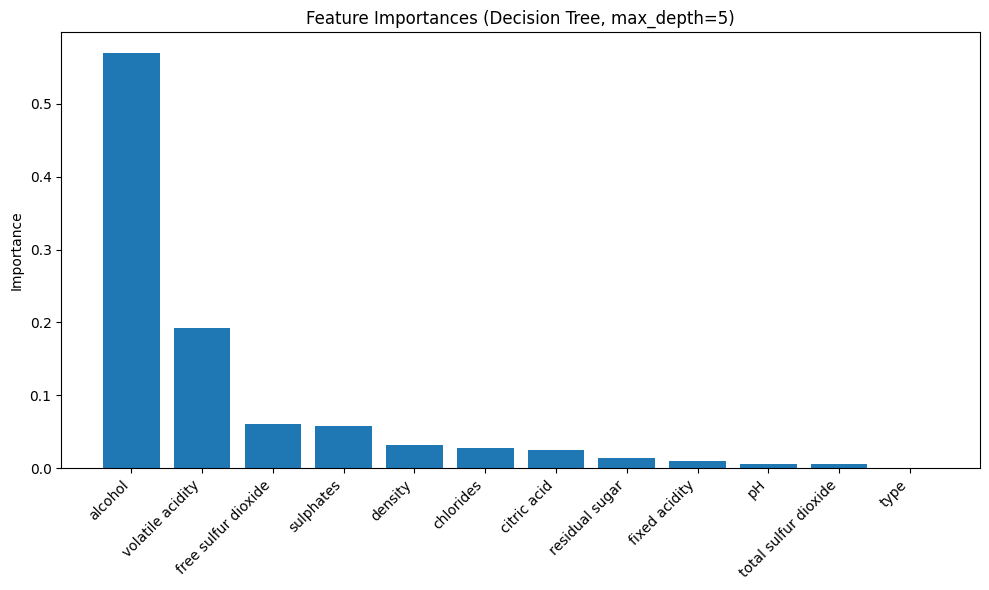

In [55]:

param_grid_depth5 = {
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10]
}

# model with max depth 5
dt_fixed = DecisionTreeRegressor(
    max_depth=5,
    random_state=0
)

#grid search
grid_depth5 = GridSearchCV(
    estimator=dt_fixed,
    param_grid=param_grid_depth5,
    scoring="neg_mean_absolute_error",
    cv=10,
    n_jobs=-1
)

grid_depth5.fit(x_train_full, y_train_full)

print("Best parameters (max_depth=5):", grid_depth5.best_params_)
print("Best CV MAE:", -grid_depth5.best_score_)

# Final best model
best_model_depth5 = grid_depth5.best_estimator_

# plot
plt.figure(figsize=(22, 12))
plot_tree(
    best_model_depth5,
    feature_names=df_full.drop(columns=["quality"]).columns,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Best Decision Tree (max_depth = 5)")
plt.show()

#print the rules
rules = export_text(
    best_model_depth5,
    feature_names=list(df_full.drop(columns=["quality"]).columns)
)

print("\n===== DECISION RULES =====")
print(rules)

# feature importance
importances = best_model_depth5.feature_importances_
feature_names = df_full.drop(columns=["quality"]).columns

# Sort descending
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(
    range(len(importances)),
    importances[sorted_idx]
)
plt.xticks(
    range(len(importances)),
    feature_names[sorted_idx],
    rotation=45,
    ha="right"
)
plt.title("Feature Importances (Decision Tree, max_depth=5)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
